Колонки в наборі даних: Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'target'],
      dtype='object')

Кількість пропущених значень в кожній колонці:
 feature_1    0
feature_2    0
feature_3    0
feature_4    0
feature_5    0
target       0
dtype: int64
Колонка 'price' не знайдена!
Epoch 1/100
3/3 [==============================] - 0s 53ms/step - loss: 268.0623 - val_loss: 285.4114
Epoch 2/100
3/3 [==============================] - 0s 13ms/step - loss: 266.2761 - val_loss: 283.6470
Epoch 3/100
3/3 [==============================] - 0s 13ms/step - loss: 264.7890 - val_loss: 282.1401
Epoch 4/100
3/3 [==============================] - 0s 13ms/step - loss: 263.4058 - val_loss: 280.7791
Epoch 5/100
3/3 [==============================] - 0s 14ms/step - loss: 262.2573 - val_loss: 279.4608
Epoch 6/100
3/3 [==============================] - 0s 13ms/step - loss: 261.0773 - val_loss: 278.1588
Epoch 7/100
3/3 [==============================] - 0s 14ms/step - loss:

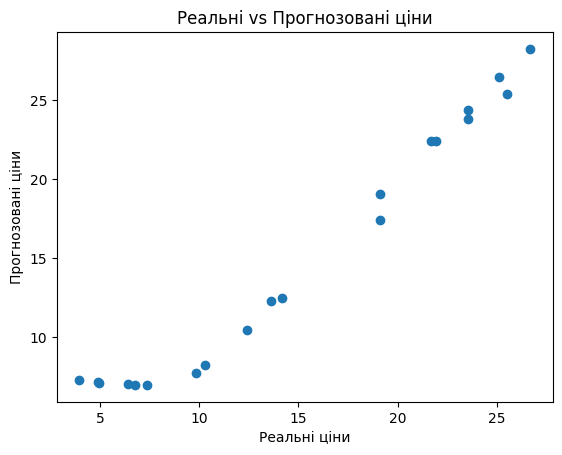

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Завантаження набору даних
data = pd.read_csv('CarPrice_Assignment.csv')

# Перевірка на наявні колонки
print("Колонки в наборі даних:", data.columns)

# Перевірка на наявність пропущених значень
print("\nКількість пропущених значень в кожній колонці:\n", data.isnull().sum())

# Припустимо, що колонка з ціною називається 'price'
# Якщо колонка має іншу назву, замініть її на правильну
if 'price' in data.columns:
    # Вибір фіч і цільової змінної
    X = data.drop(columns=['price'])
    y = data['price']
else:
    print("Колонка 'price' не знайдена!")

# Розділення на тренувальний і тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабування фіч
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Створення моделі нейронної мережі для регресії
model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Останній шар без активації, оскільки ми робимо регресію
])

# Компіляція моделі
model.compile(optimizer='adam', loss='mean_squared_error')

# Тренування моделі
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test))

# Оцінка моделі
loss = model.evaluate(X_test_scaled, y_test)
print(f'Оцінка моделі на тестових даних: {loss}')

# Прогнозування
y_pred = model.predict(X_test_scaled)

# Візуалізація результатів
plt.scatter(y_test, y_pred)
plt.xlabel('Реальні ціни')
plt.ylabel('Прогнозовані ціни')
plt.title('Реальні vs Прогнозовані ціни')
plt.show()
